# Syed Muhammad Taqi Raza Kazmi

# DATA DESCRIPTION
Image data described by high-level numeric-valued attributes, 7 classes
## The 19 attributes are:
    - region-centroid-col, 
    - region-centroid-row, 
    - region-pixel-count,
    - short-line-density-5, 
    - short-line-density-2, 
    - vedge-mean, 
    - vegde-sd, 
    - hedge-mean, 
    - hedge-sd
    - Intensity-mean, 
    - rawred-mean, 
    - rawblue-mean, 
    - rawgreen-mean, 
    - exred-mean, 
    - exblue-mean, 
    - exgreen-mean,
    - value-mean,
    - saturatoin-mean,
    - hue-mean

***Comments***
-------------------------
- We have first tried to do clustering but it seemed misfit for such dataset and hence we moved to multiclass classification
- Though there are other classification methods used in Machine Learning such as the Support Vector Regression, Logistic Regression and Support Vector Machines among many, in this work, we relied on the Support Vector Machine algorithm which is widely used due to its simplicity and robustness during implementation.
- Deriving of best/optimized parameters could be time consuming for very large dataset.

## 1. Prepare Problem


In [66]:
import numpy as np # data manipulation
import pandas as pd # load and manipulate data
import matplotlib.pyplot as plt # drawing graphs
import seaborn as sns # for scatterplots
import matplotlib.cm as cm
import matplotlib as mpl
import tensorflow as tf
import seaborn as sn


from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from pandas import DataFrame
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier


In [67]:
# Reading the required data

# Load the data file
data = pd.read_csv('segmentation_project.data')

data = pd.read_csv("segmentation_project.data", index_col=0)  # Assuming the first column is the index

data.index.name = "IMAGES"  # Assigning the name "Image" to the index column

data.reset_index(inplace=True)  # Reset the index

data.rename(columns={"index": "COUNT"}, inplace=True)  # Rename the index column as "COUNT"

data

,IMAGES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,GRASS,36.0,243.0,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,GRASS,186.0,218.0,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,GRASS,197.0,236.0,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,GRASS,208.0,240.0,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [68]:
# Load the test file
test = pd.read_csv('segmentation_project.test')

test = pd.read_csv("segmentation_project.test", index_col=0)  # Assuming the first column is the index

test.index.name = "IMAGES"  # Assigning the name "Image" to the index column

test.reset_index(inplace=True)  # Reset the index
test.rename(columns={"index": "COUNT"}, inplace=True)  # Rename the index column as "COUNT"

test

,IMAGES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CEMENT,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,CEMENT,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,CEMENT,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,CEMENT,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [69]:
# Converting the values of specific columns into integer number for the dataset "segmentation.data"

data['REGION-CENTROID-COL'] = data['REGION-CENTROID-COL'].astype(int)
data['REGION-CENTROID-ROW'] = data['REGION-CENTROID-ROW'].astype(int)


# Getting the summary view of the dataset after converting

data

,IMAGES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140,125,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,GRASS,36,243,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,GRASS,186,218,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,GRASS,197,236,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,GRASS,208,240,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [70]:
# Converting the values of specific columns into integer number for the dataset "segmentation.test"

test['REGION-CENTROID-COL'] = test['REGION-CENTROID-COL'].astype(int)
test['REGION-CENTROID-ROW'] = test['REGION-CENTROID-ROW'].astype(int)


# Getting the summary view of the dataset after converting

test

,IMAGES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110,189,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86,187,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225,244,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47,232,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97,186,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CEMENT,32,158,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,CEMENT,8,162,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,CEMENT,128,161,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,CEMENT,150,158,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [71]:
# Combining the datasets "data" and "test"
project = pd.concat([data, test], ignore_index=True)

# Print the combined dataset
print(project)

         IMAGES  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0     BRICKFACE                  140                  125                   9   
1     BRICKFACE                  188                  133                   9   
2     BRICKFACE                  105                  139                   9   
3     BRICKFACE                   34                  137                   9   
4     BRICKFACE                   39                  111                   9   
...         ...                  ...                  ...                 ...   
2305     CEMENT                   32                  158                   9   
2306     CEMENT                    8                  162                   9   
2307     CEMENT                  128                  161                   9   
2308     CEMENT                  150                  158                   9   
2309     CEMENT                  124                  162                   9   

      SHORT-LINE-DENSITY-5 

## 2. Prepare Data

In [72]:
# Check for missing values
project.isnull().sum()

IMAGES                  0
REGION-CENTROID-COL     0
REGION-CENTROID-ROW     0
REGION-PIXEL-COUNT      0
SHORT-LINE-DENSITY-5    0
SHORT-LINE-DENSITY-2    0
VEDGE-MEAN              0
VEDGE-SD                0
HEDGE-MEAN              0
HEDGE-SD                0
INTENSITY-MEAN          0
RAWRED-MEAN             0
RAWBLUE-MEAN            0
RAWGREEN-MEAN           0
EXRED-MEAN              0
EXBLUE-MEAN             0
EXGREEN-MEAN            0
VALUE-MEAN              0
SATURATION-MEAN         0
HUE-MEAN                0
dtype: int64

In [73]:
# Check for duplicates
project.duplicated().sum()

224

In [74]:
# To remove the duplicates
project.drop_duplicates(keep=False,inplace=True) 

In [75]:
project[project.duplicated(keep=False)]

,IMAGES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN


In [76]:
# Get summary statistics of the dataset
project.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,1864.000000,1864.000000,1864.0,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1.864000e+03,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000
mean,124.719421,123.093348,9.0,0.015856,0.004411,1.889068,5.757442,2.358011,7.229748e+00,37.245529,32.963698,44.453267,34.319624,-12.845494,21.623212,-8.777718,45.429900,0.428185,-1.363306
std,72.727339,57.530462,0.0,0.042302,0.022889,2.599880,45.474423,3.262421,4.607906e+01,38.249246,35.102464,43.668320,36.385147,11.615548,19.826159,11.735815,43.044582,0.228776,1.551001
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.589457e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175
25%,62.000000,81.000000,9.0,0.000000,0.000000,0.722222,0.344444,0.833332,4.276291e-01,7.833333,7.111111,9.972222,6.444445,-18.694444,4.444445,-17.000000,12.222222,0.285694,-2.187873
50%,120.000000,121.000000,9.0,0.000000,0.000000,1.277776,0.833333,1.444444,9.981463e-01,21.740740,19.777779,27.777779,20.444445,-11.000000,19.888890,-11.111111,28.666666,0.375902,-2.056137
75%,188.000000,169.000000,9.0,0.000000,0.000000,2.222222,1.809441,2.555555,2.243519e+00,53.694446,47.805557,66.000001,46.916668,-4.222222,36.444443,-3.000000,66.000001,0.540634,-1.570254
max,254.000000,251.000000,9.0,0.333333,0.222222,29.222221,991.718400,43.333332,1.039541e+03,141.814820,137.111110,150.111110,140.000000,9.888889,82.000000,24.666666,150.111110,1.000000,2.912480


In [77]:
project

,IMAGES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
210,GRASS,110,189,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
211,GRASS,86,187,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
212,GRASS,225,244,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
213,GRASS,47,232,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
214,GRASS,97,186,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,CEMENT,233,159,9,0.000000,0.0,2.500000,0.522222,1.277778,1.574074,6.629630,5.111111,10.111111,4.666667,-4.555555,10.444445,-5.888889,10.111111,0.541667,-1.999443
2305,CEMENT,32,158,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2306,CEMENT,8,162,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2307,CEMENT,128,161,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307


In [78]:
project.reset_index(inplace=True)  # Reset the index

In [79]:
project = project.drop(['index'], axis=1)

In [80]:
project

,IMAGES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110,189,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86,187,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225,244,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47,232,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97,186,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,CEMENT,233,159,9,0.000000,0.0,2.500000,0.522222,1.277778,1.574074,6.629630,5.111111,10.111111,4.666667,-4.555555,10.444445,-5.888889,10.111111,0.541667,-1.999443
1860,CEMENT,32,158,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
1861,CEMENT,8,162,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
1862,CEMENT,128,161,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307


In [81]:
print("\t\t\tProject_Dataset Statistics")
print(f"Number of variables: {len(project.columns)}")
print(f"Number of observations: {project.shape[0]}")
print(f"Missing Values: {project.isna().sum().sum()}")
print(f"Missing Values : {round(project.isna().sum().sum()/project.shape[0]*100,3)}")
print(f"Duplicate rows: {project[project.duplicated(keep=False)].shape[0]}")
print(f"Duplicate rows (%): {round(project[project.duplicated(keep='first')].shape[0]/project.shape[0]*100,3)}")
print("Variable types: ")
a=pd.crosstab(data.dtypes,columns="Count")
for i in pd.crosstab(data.dtypes,columns="Count").index:
    print("\t"+str(i).split()[0],a.loc[i][0])

			Project_Dataset Statistics
Number of variables: 20
Number of observations: 1864
Missing Values: 0
Missing Values : 0.0
Duplicate rows: 0
Duplicate rows (%): 0.0
Variable types: 
	int32 2
	int64 1
	float64 16
	object 1


In [82]:
project.shape

(1864, 20)

### DATA CLEANING
- Missing values check
    - dataframe has no missing values as stated on the source website which we confirmed in this section.
- Duplicate rows check
    - We observed 224 duplicate rows 
    - we considered them as unhealthy to the dataset so they were removed.
- Dataframe structure
    - There are 20 columns of the dataset 
    - 19 columns. each representing a feature.
    - 1 describing the name of images
    - There are 1864 instances

## 3-Exploratory Analysis

### Exploring attribute distributions

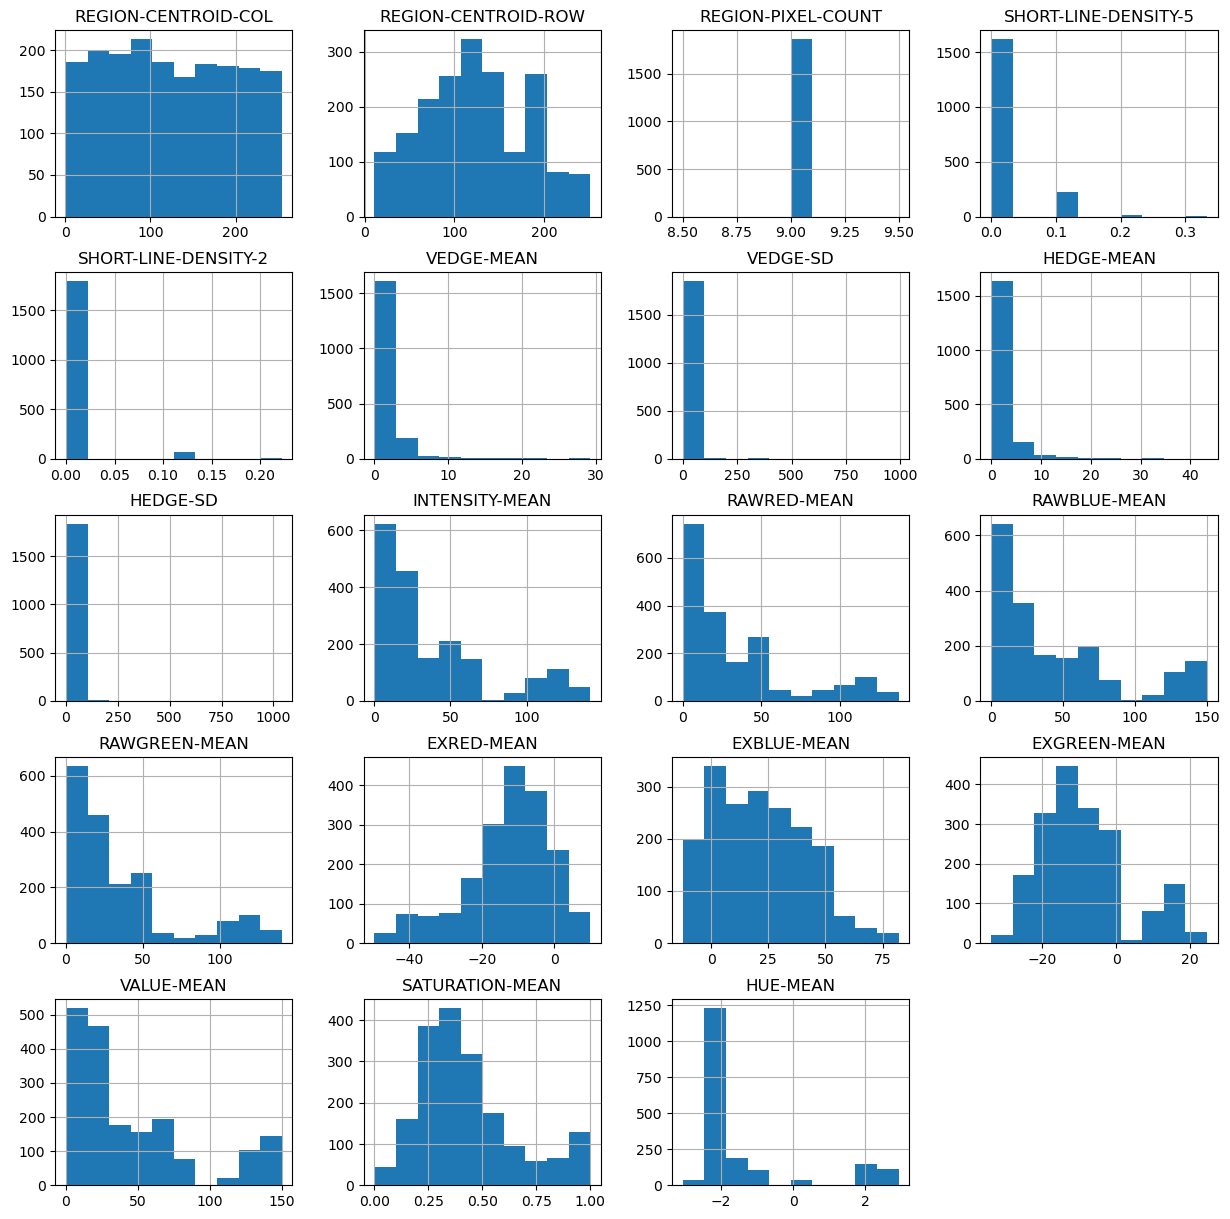

In [83]:
# Plot histograms of numerical attributes
project.hist(figsize=(15, 15))
plt.show()

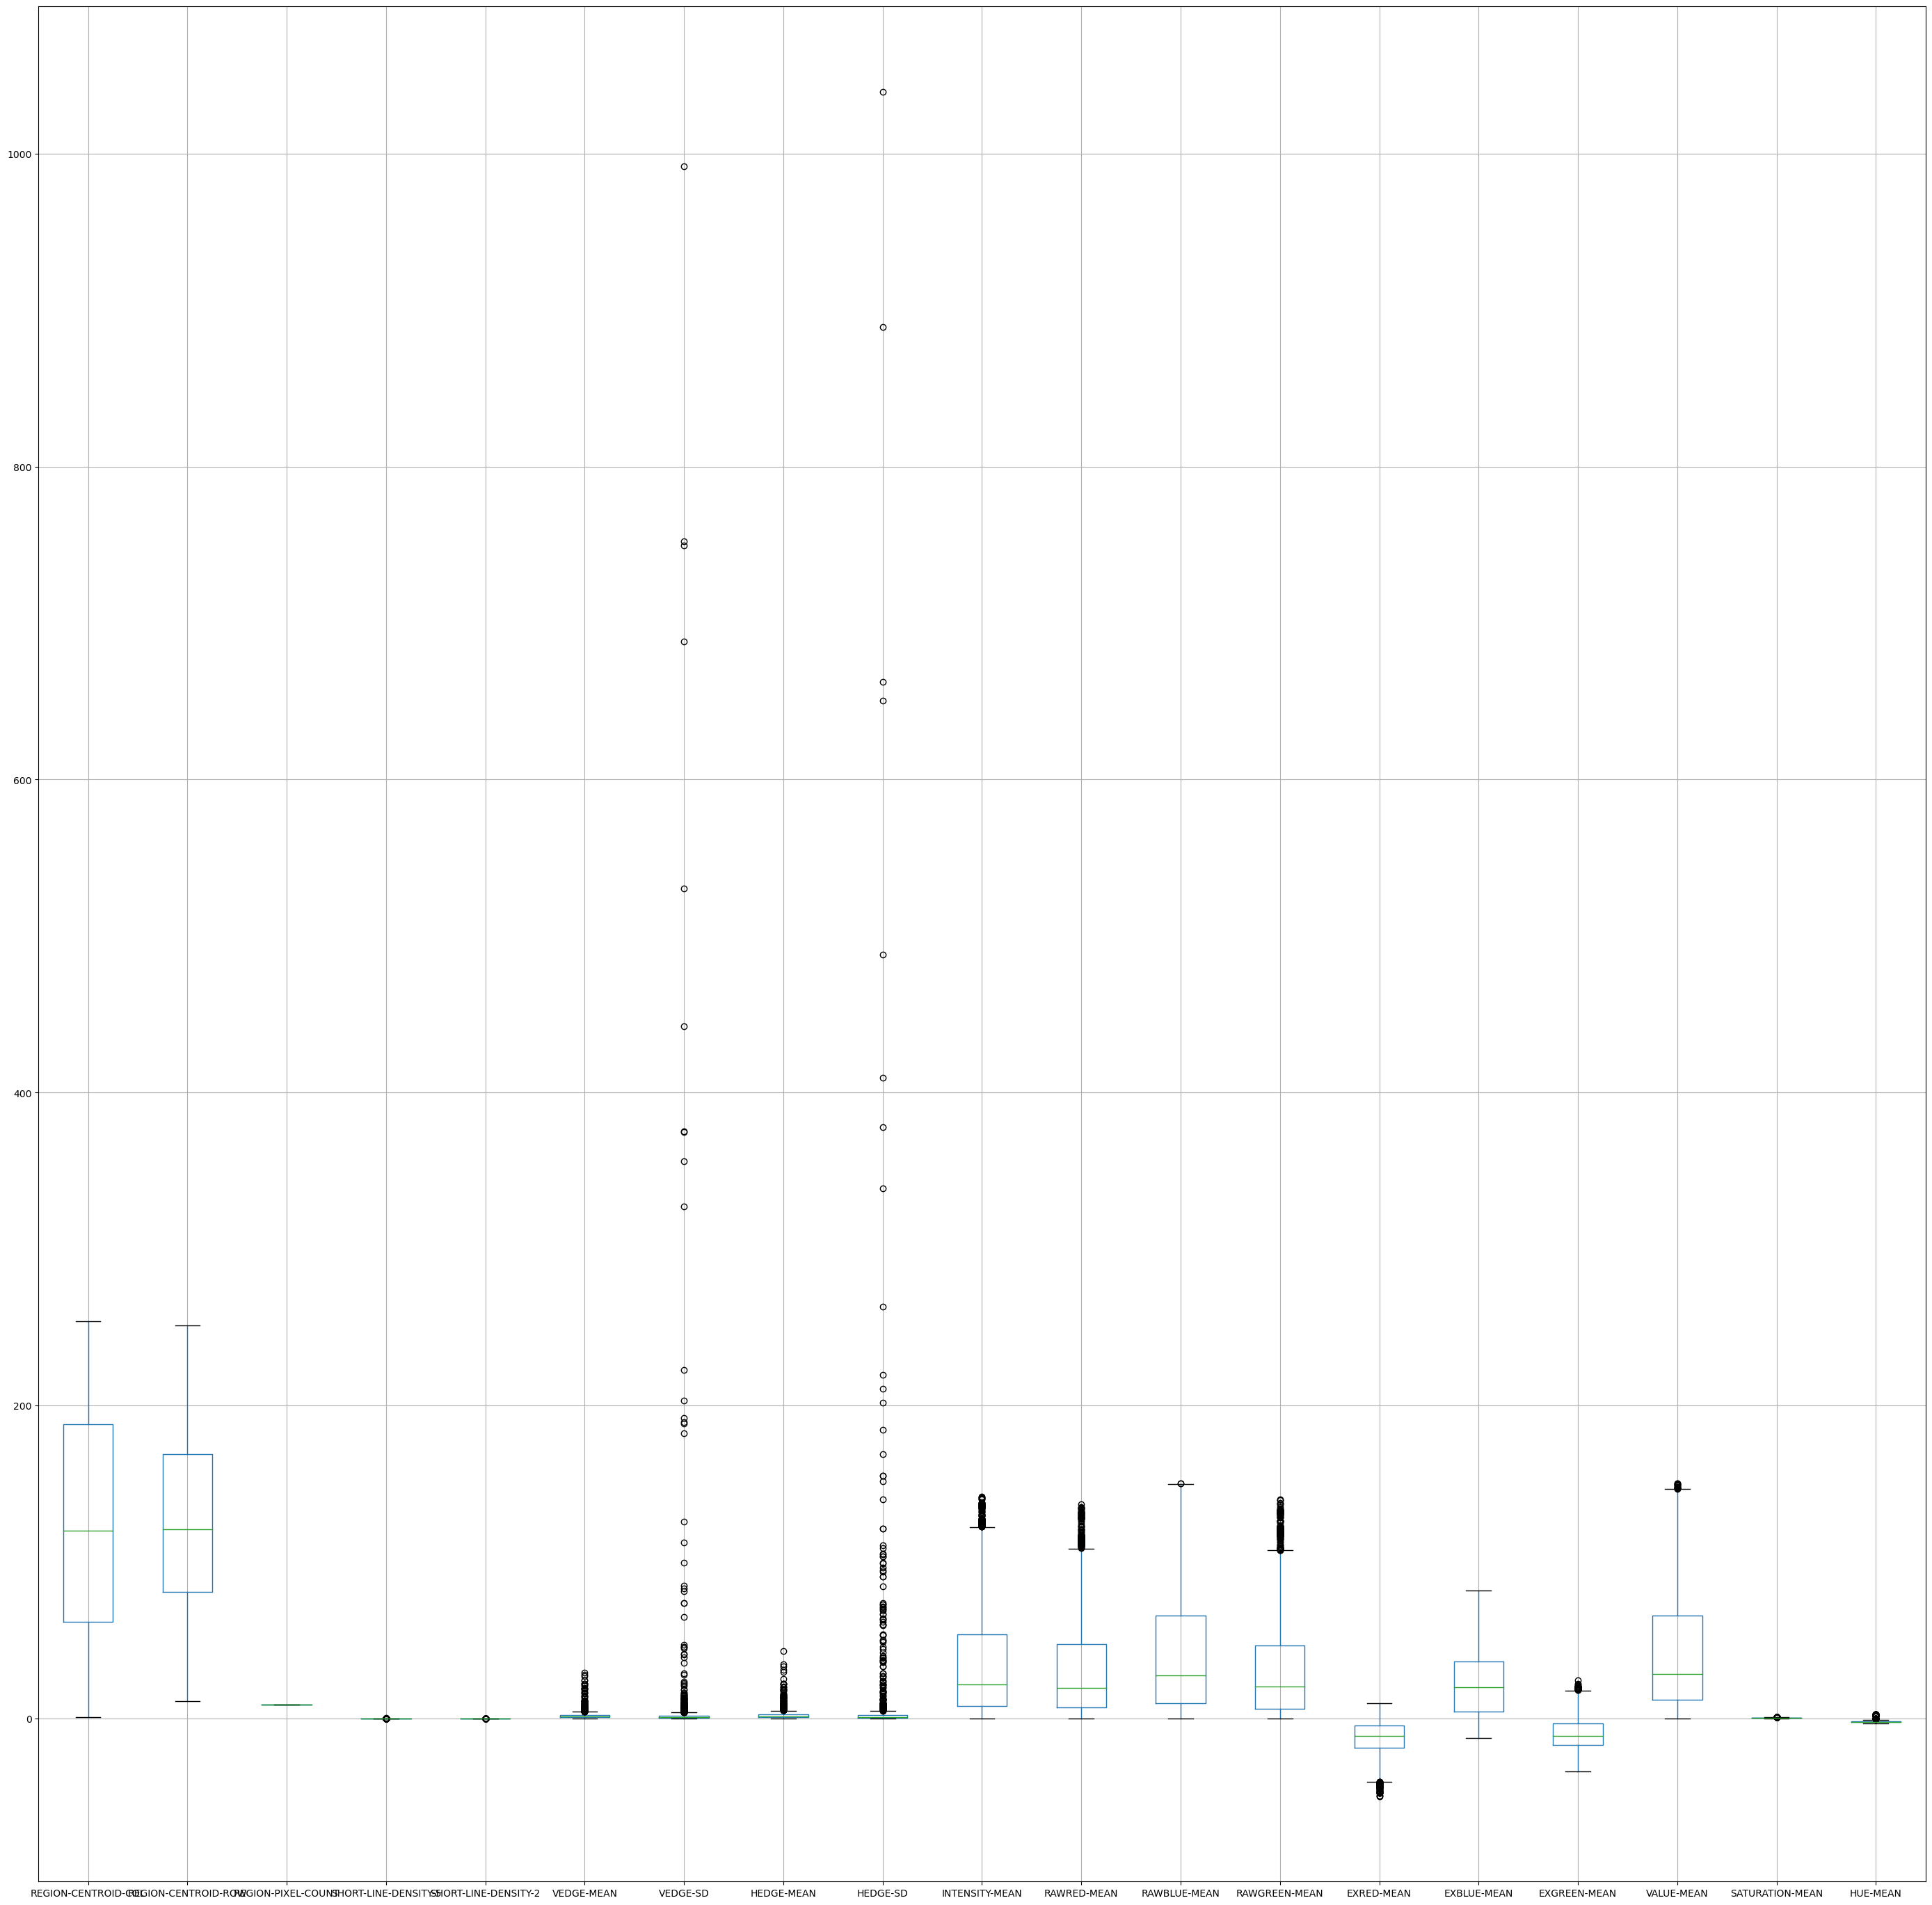

In [84]:
# Plot box plots of numerical attributes
project.boxplot(figsize=(35, 35))
plt.show()

### Analyzing relationships and patterns:

In [85]:
# Calculate correlation between attributes
correlation_matrix = project.corr()

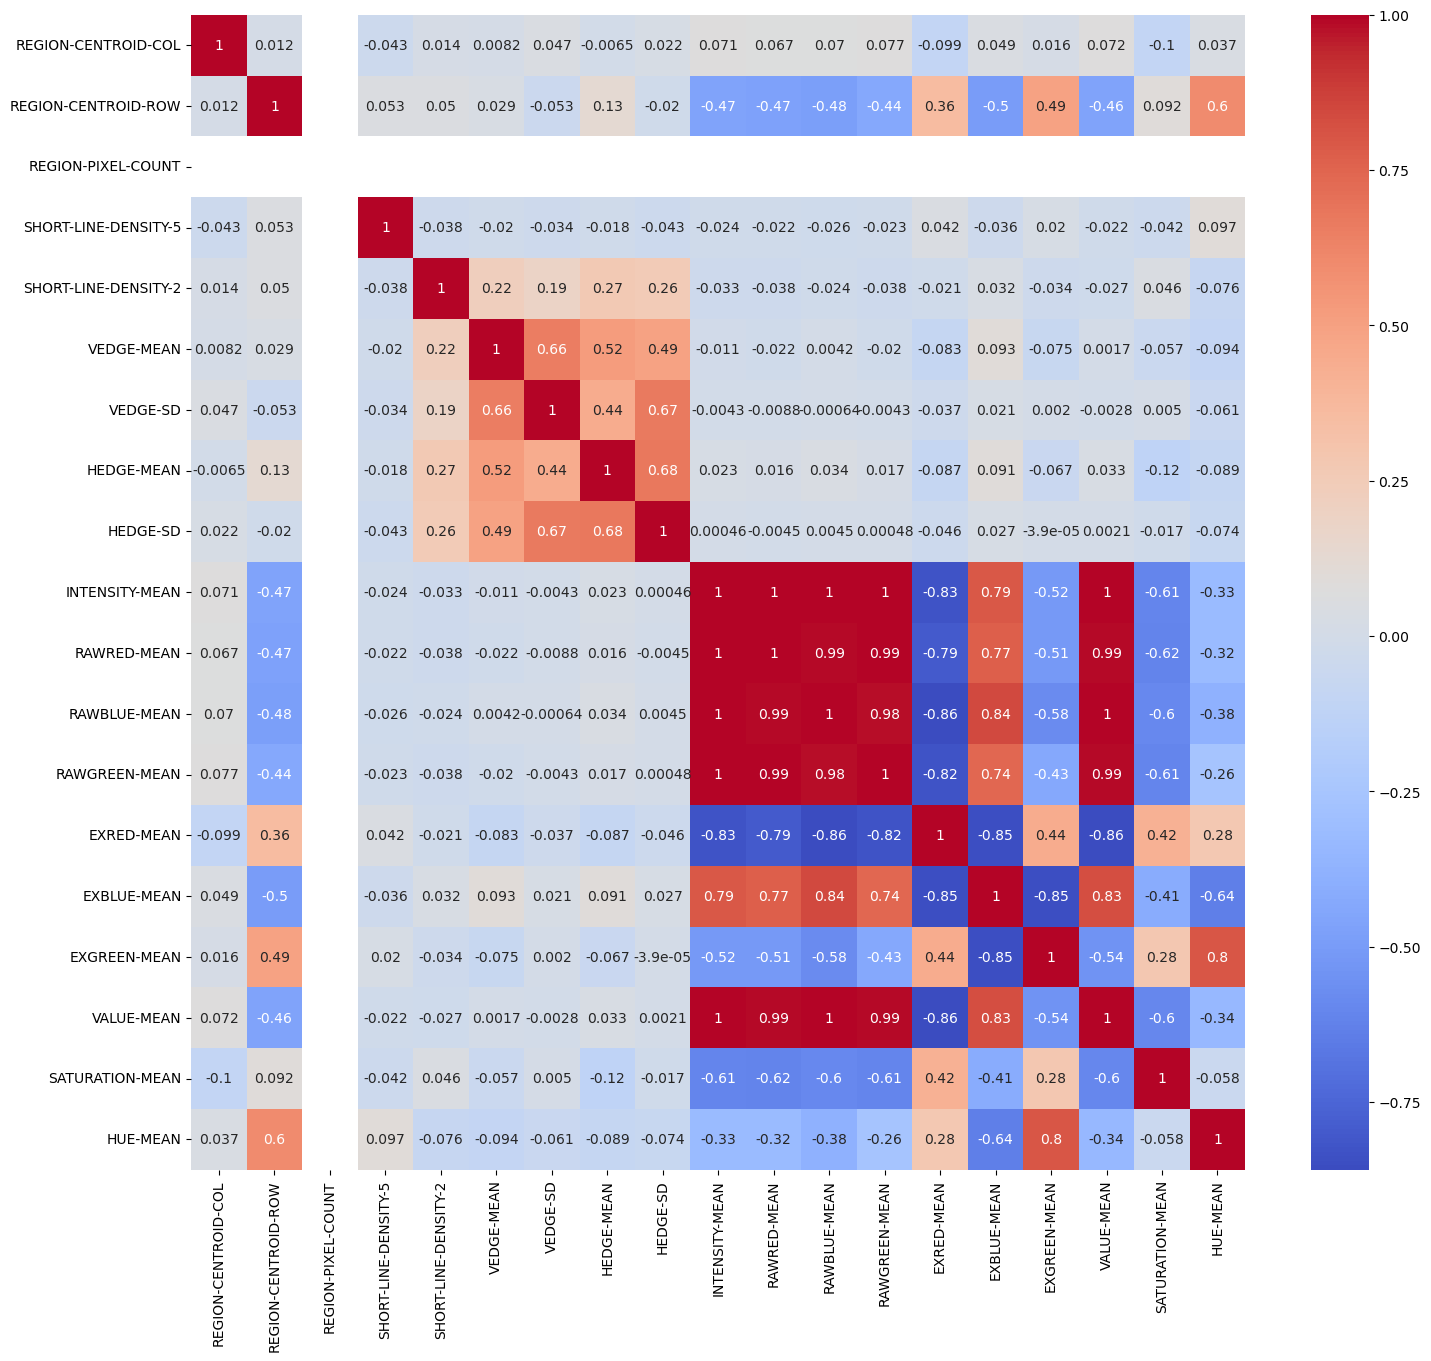

In [86]:
# Visualize correlation matrix using a heatmap

plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

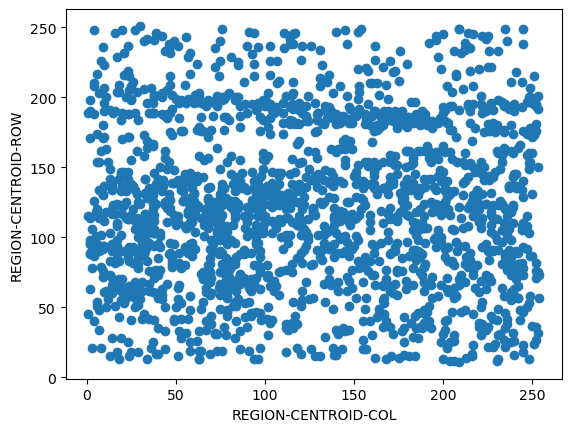

In [87]:
# Explore relationships between attributes using scatter plots or other visualizations
plt.scatter(project['REGION-CENTROID-COL'], project['REGION-CENTROID-ROW'])
plt.xlabel('REGION-CENTROID-COL')
plt.ylabel('REGION-CENTROID-ROW')
plt.show()

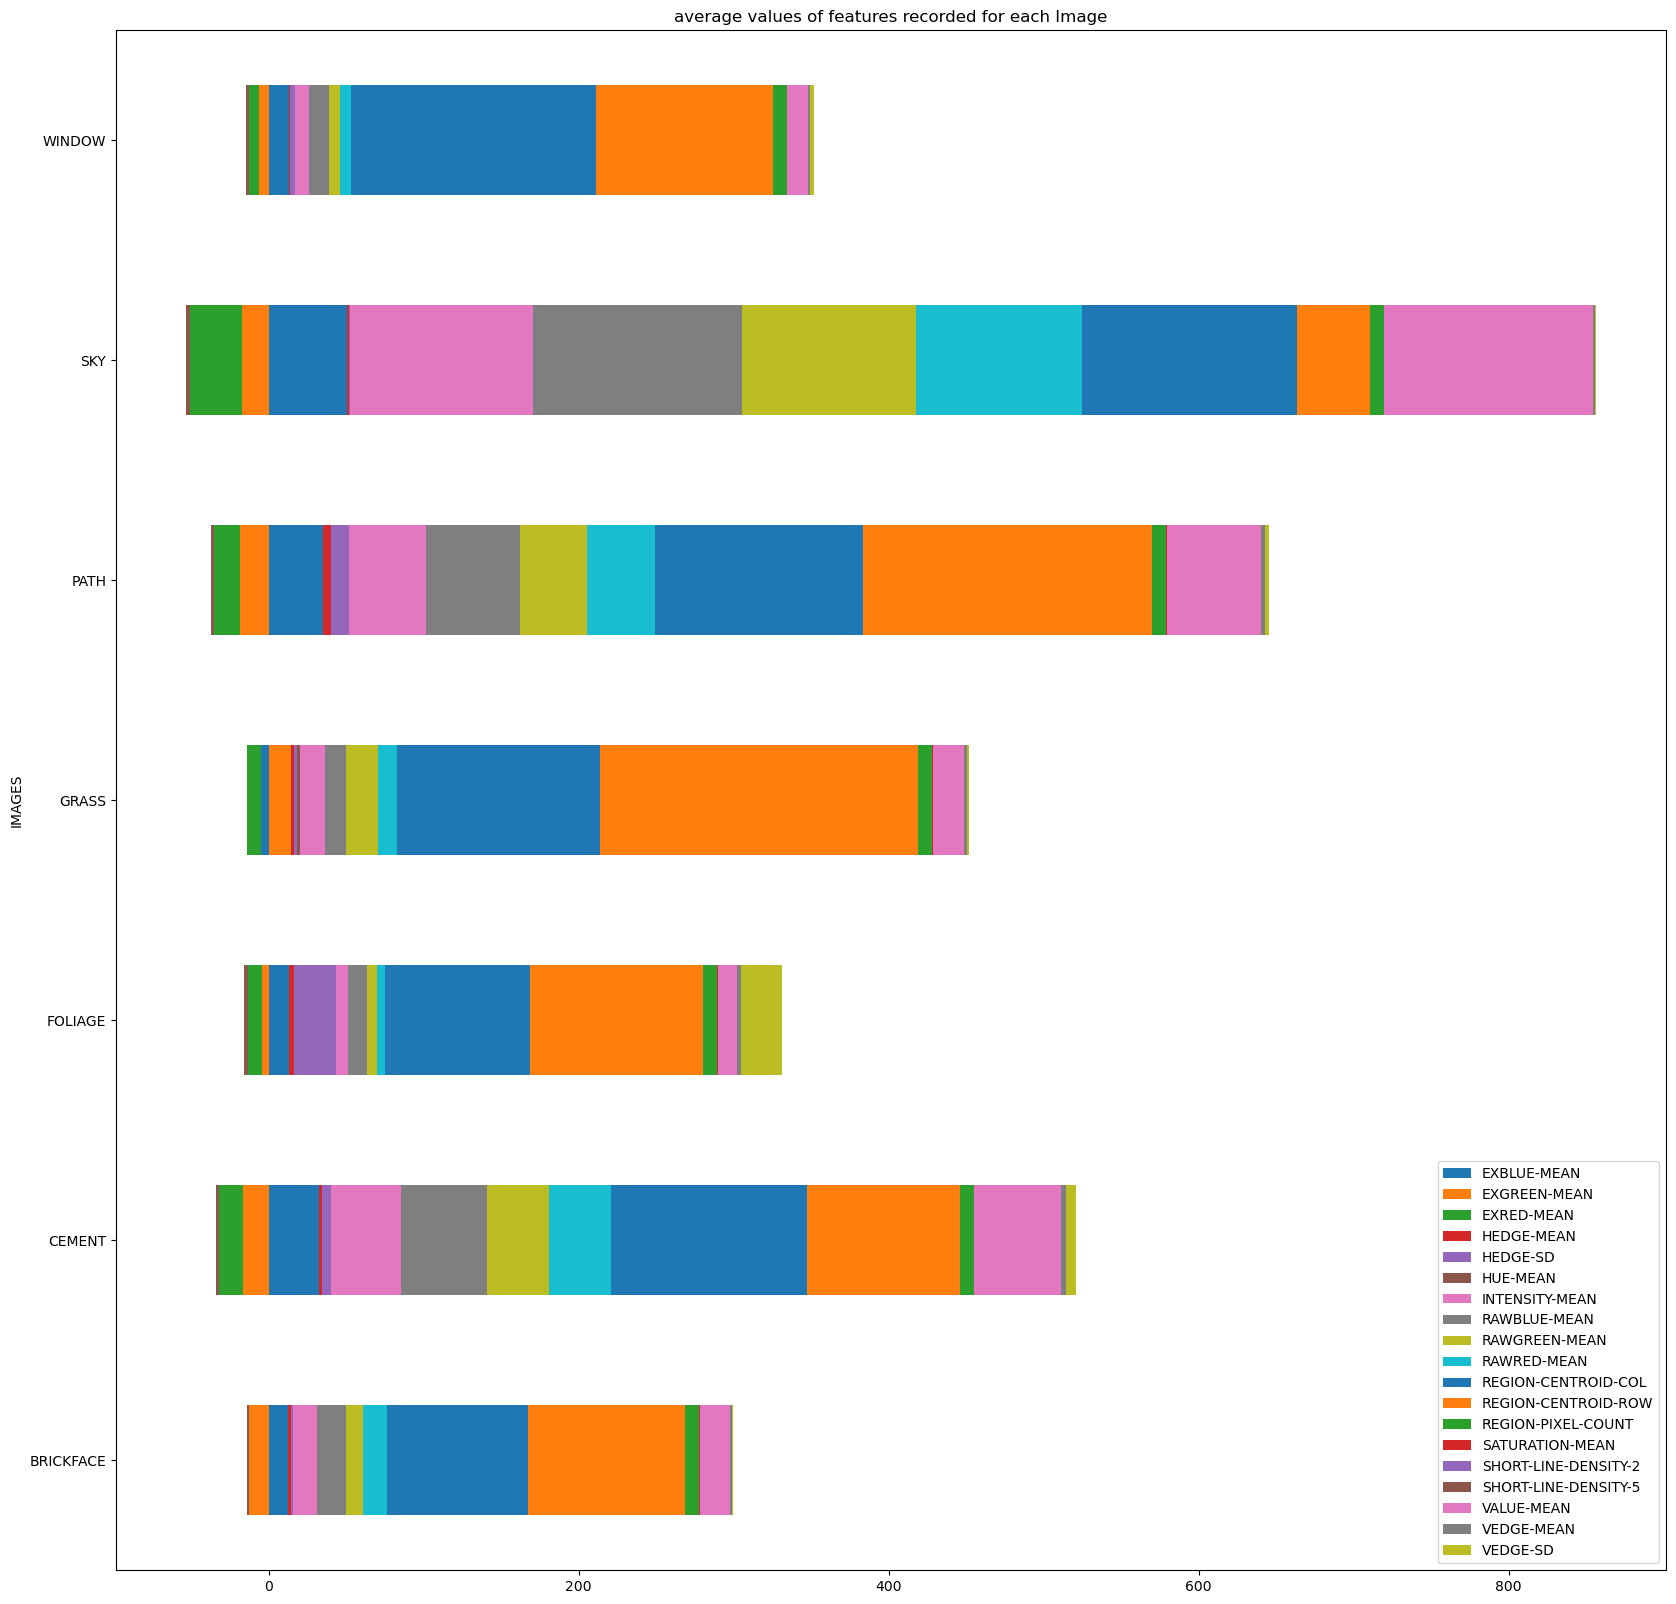

In [88]:
# average values of features recorded for each Image
project.pivot_table(index='IMAGES').plot.barh(
    figsize=(20,20),
    title='average values of features recorded for each Image',
    stacked=True)
##plt.savefig('./images/activity_all_bar_stacked')
plt.show()

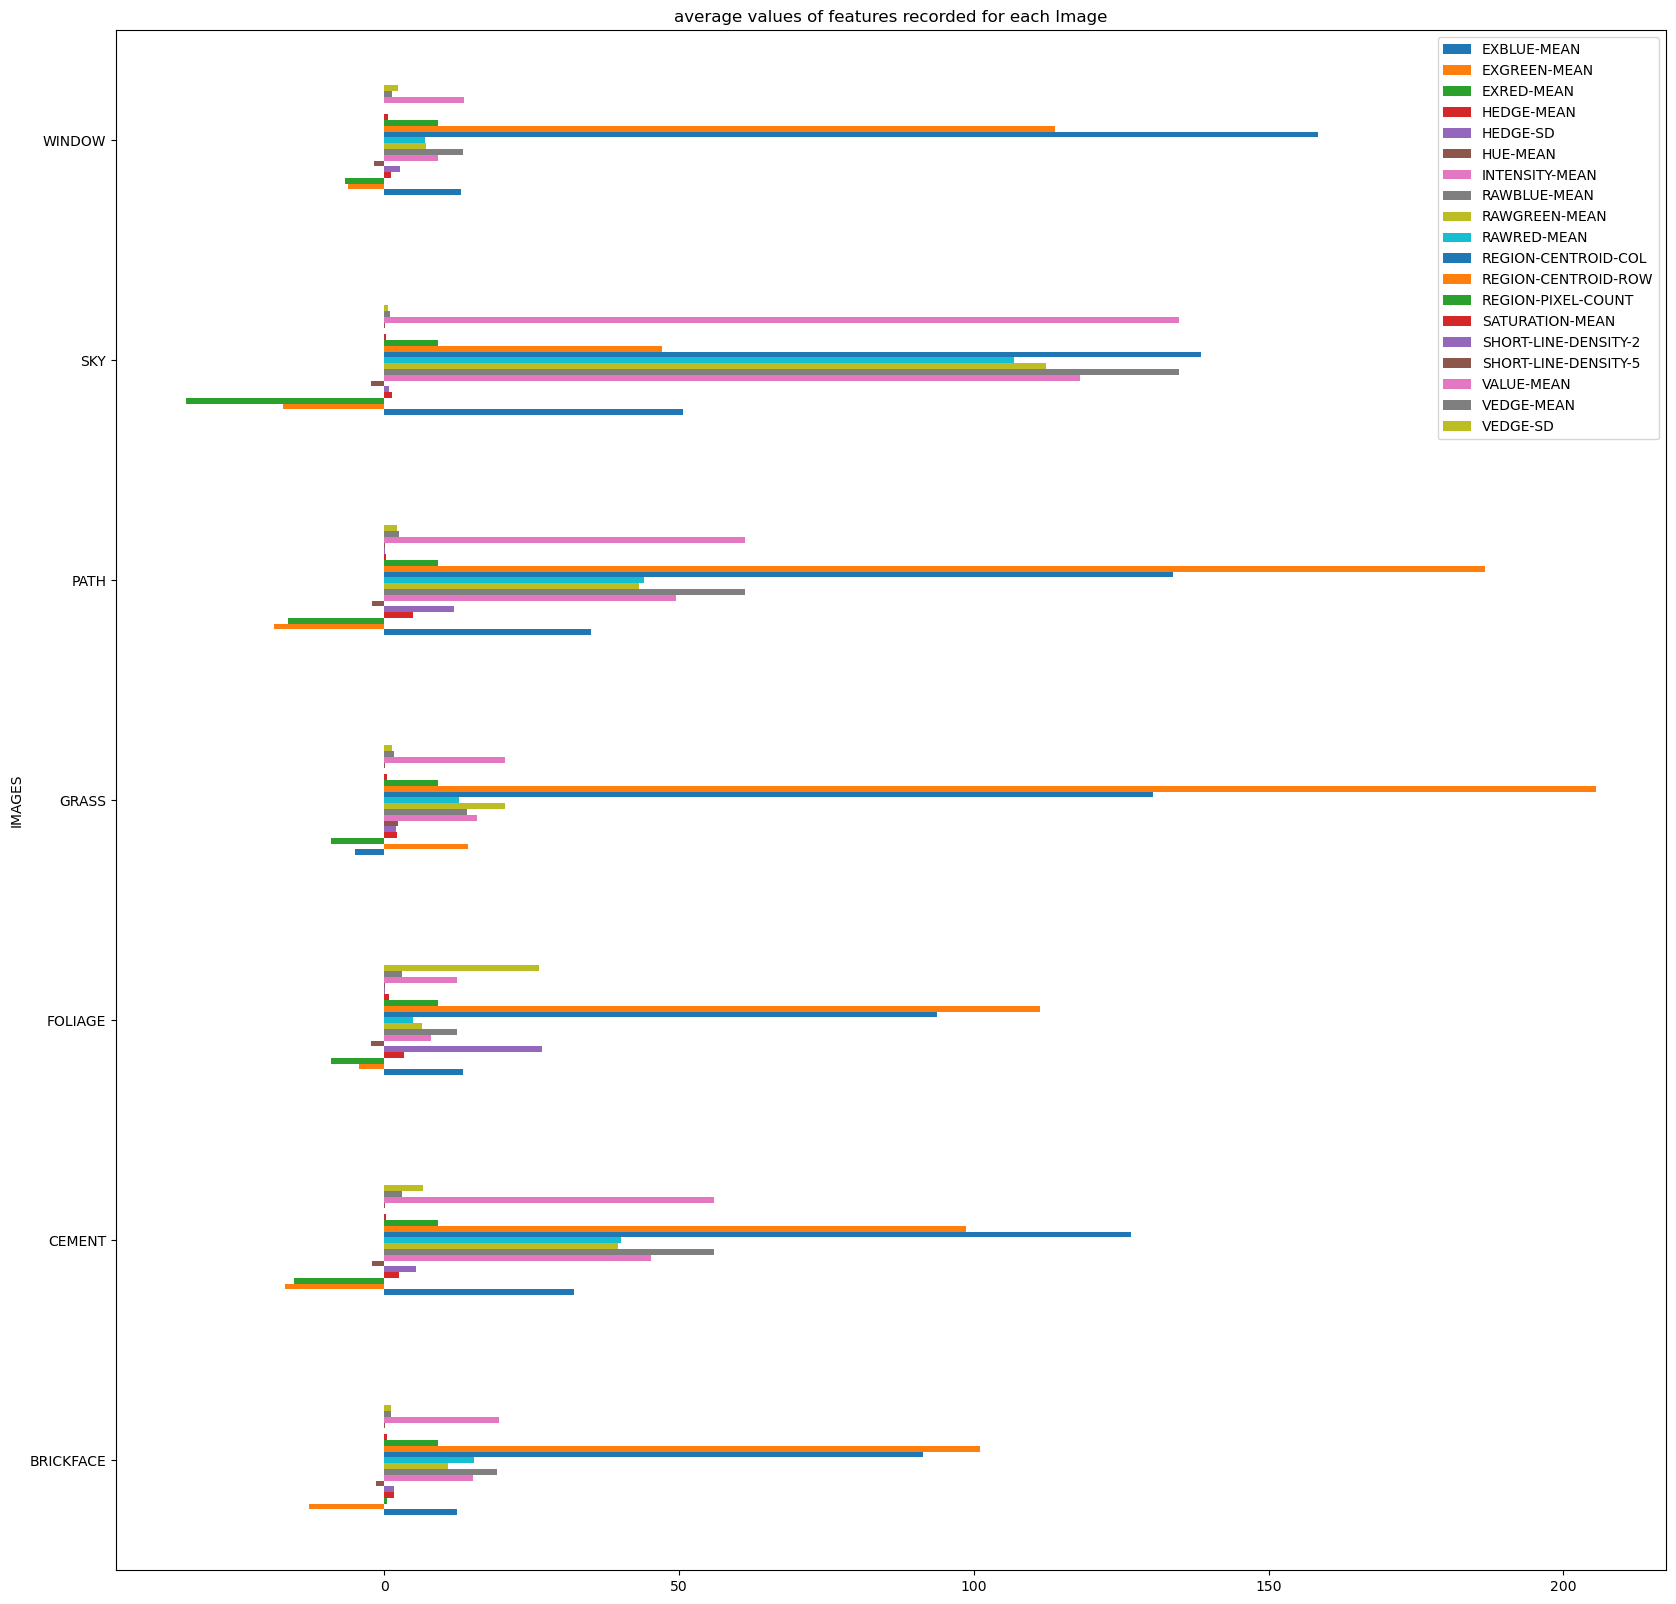

In [89]:
# average values of features recorded for each Image
project.pivot_table(index='IMAGES').plot.barh(
    figsize=(20,20),
    title='average values of features recorded for each Image',
#   stacked=True
)
#plt.savefig('D/images/activity_all_bar_unstacked')
plt.show()

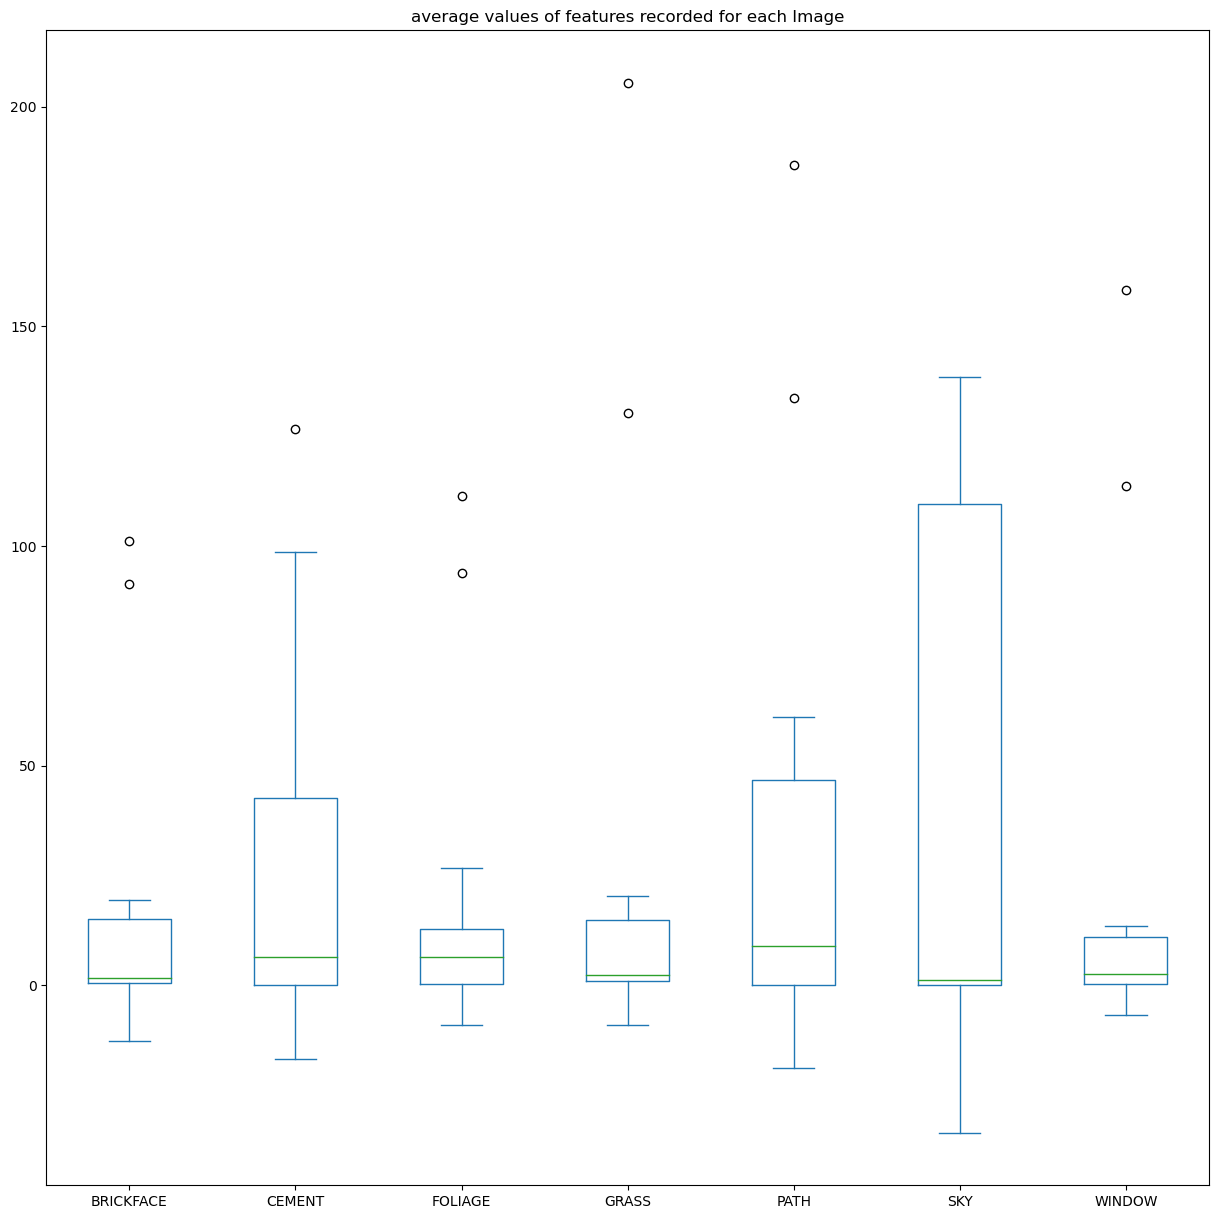

In [90]:
project.pivot_table(columns='IMAGES').plot.box(
    figsize=(15,15),
    title='average values of features recorded for each Image')
#plt.savefig('./images/activity_box')
plt.show()

In [91]:
# column labels descriptions
project.columns

Index(['IMAGES', 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW',
       'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2',
       'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN',
       'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN',
       'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN',
       'HUE-MEAN'],
      dtype='object')

## 4- Main Analysis

### The Main Idea

In this task, I am trying to implement K-Means clustering with Python and Scikit-Learn.I have used Image Segmentation dataset and implement K-Means clustering to find intrinsic groups within this dataset , if found its not a better startegy , I would proceed with Multiclass Classification

### "Clustering"


K-Means clustering is the most popular unsupervised learning algorithm. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.The aim here would be to discover inherent groupings within the images and possibly identify any outliers. It is based on centroid-based clustering.A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. K-Means clustering works as follows:- The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-

1. Data assignment step

Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.

2. Centroid update step

In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid’s cluster.

The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached


In your case, clustering can be used to group the 1864 instances into 7 clusters, each representing a class of images (brick, sky, foliage, cement, window, path, grass).

In [92]:
# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

We know that there are 1864 instances and 20 attributes in the dataset.

In [93]:
project

,IMAGES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110,189,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86,187,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225,244,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47,232,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97,186,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,CEMENT,233,159,9,0.000000,0.0,2.500000,0.522222,1.277778,1.574074,6.629630,5.111111,10.111111,4.666667,-4.555555,10.444445,-5.888889,10.111111,0.541667,-1.999443
1860,CEMENT,32,158,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
1861,CEMENT,8,162,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
1862,CEMENT,128,161,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307


### To standardize the features in a dataset

There are categorical variable (string) in our dataset that cannot be directly converted to a numerical value. Machine learning algorithms typically require numerical input data, so we need to preprocess our data by encoding categorical variables.

In [94]:

# Identify categorical variable(s)
categorical_features = ['IMAGES']

# Separate categorical variable(s) and numerical features
categorical_data = project[categorical_features]
numerical_data = project.drop(categorical_features, axis=1)

# Apply one-hot encoding to categorical variable(s)
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_data).toarray()

# Concatenate encoded categorical variable(s) with numerical features
Project = np.concatenate((numerical_data, encoded_data), axis=1)

# Scale the processed data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Project)


In [95]:
Project

array([[110., 189.,   9., ...,   0.,   0.,   0.],
       [ 86., 187.,   9., ...,   0.,   0.,   0.],
       [225., 244.,   9., ...,   0.,   0.,   0.],
       ...,
       [  8., 162.,   9., ...,   0.,   0.,   0.],
       [128., 161.,   9., ...,   0.,   0.,   0.],
       [124., 162.,   9., ...,   0.,   0.,   0.]])

### PCA ANALYSIS
For visualization we perform dimensionality reduction via PCA on the 19 features since we cannot have a 19-dimensional plot for the columns/features in Project Dataset. 


In [96]:
scaler = StandardScaler()
#StandardScaler is a preprocessing class that standardizes features by subtracting the mean and dividing by the standard deviation.
scaler.fit(Project)
#The fit() method calculates the mean and standard deviation of each feature in the 'project' dataset
Project_scaled = scaler.transform(Project)
#Applies the learned transformation (mean subtraction and division by standard deviation) to the 'project' dataset. It returns a new dataset

print(Project_scaled)
print(f'mean of scaled features {np.mean(Project_scaled,0)}')
print(f'st.dev. of scaled features {np.std(Project_scaled,0)}')
#The np.std() function from NumPy is used to calculate the standard deviation along each column (axis 0) of data_scaled.

[[-0.20244616  1.14590317  0.         ... -0.39900373 -0.41156433
  -0.40799274]
 [-0.53253441  1.11112965  0.         ... -0.39900373 -0.41156433
  -0.40799274]
 [ 1.37922672  2.10217498  0.         ... -0.39900373 -0.41156433
  -0.40799274]
 ...
 [-1.60532124  0.67646064  0.         ... -0.39900373 -0.41156433
  -0.40799274]
 [ 0.04512003  0.65907388  0.         ... -0.39900373 -0.41156433
  -0.40799274]
 [-0.00989468  0.67646064  0.         ... -0.39900373 -0.41156433
  -0.40799274]]
mean of scaled features [ 1.28019614e-17  1.36454987e-16  0.00000000e+00  4.67913738e-16
 -4.98915406e-16 -1.28281684e-15 -2.31879668e-16 -5.33155720e-16
  3.29374105e-17 -1.08687499e-15 -5.17230512e-16  2.67483937e-15
 -7.92106009e-16  2.75292426e-15 -1.06459905e-15 -6.02686118e-17
  2.75209040e-15  1.89028276e-15  5.40906137e-16 -1.59928103e-15
 -4.12116693e-15  1.23446794e-15 -8.67868009e-16  2.14486273e-15
 -1.33101684e-15  1.60750049e-15]
st.dev. of scaled features [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.

In [97]:
Project_scaled.shape

(1864, 26)

 ### Use of the K-means clustering algorithm

In [98]:
K = 5 #defines the number of clusters (K)
kmeans_model = KMeans(n_clusters=K, init='random', n_init=20)
#The n_init parameter is set to 20, which means the algorithm will run 20 times with different random
#initializations and select the best result.
kmeans_model.fit(Project_scaled)
#The K-means algorithm will attempt to find K clusters in the data by iteratively updating the cluster 
#centroids and assigning data points to the nearest centroid.
y = kmeans_model.labels_
#Retrieves the cluster labels assigned to each data point by the K-means algorithm
print(f'obtained clustering \n {y}\n')
#Each value in the y array represents the cluster label assigned to the corresponding data point.
print(f'clusters centroids\n {kmeans_model.cluster_centers_}\n')
print(f'final overall distance points-centroids {kmeans_model.inertia_}')

## prints the final overall distance between data points and their respective cluster centroids. 
#The inertia_ attribute of the KMeans object provides this value, which is often referred to as 
#the within-cluster sum of squares or the objective function value. It represents the sum of squared 
#distances of all samples to their closest centroids.

obtained clustering 
 [4 4 4 ... 1 1 1]

clusters centroids
 [[ 7.46445908e-02  3.03158616e-01  0.00000000e+00  5.40707667e-03
   5.69507474e-02  3.66183941e-01 -2.67082785e-02  4.60449437e-01
   3.61934547e-02  2.73882515e-01  2.66698551e-01  3.35476863e-01
   2.03816996e-01 -2.87723818e-01  6.31576422e-01 -7.82192382e-01
   3.17815261e-01 -5.49525192e-01 -4.46367982e-01 -4.06201920e-01
   1.00097670e+00 -3.66349892e-01 -4.11564326e-01  1.01764952e+00
  -4.11564326e-01 -4.07992736e-01]
 [-1.47448905e-01 -2.29151277e-01  0.00000000e+00 -2.81755147e-02
   2.29020402e-02 -1.91813120e-01 -6.07121992e-02 -2.59329372e-01
  -8.49238576e-02 -7.16407928e-01 -7.02694568e-01 -6.98868646e-01
  -7.42650794e-01  7.06574988e-01 -4.71552251e-01  9.72931725e-02
  -7.29141348e-01  7.13539861e-01 -2.80113845e-01  5.54661505e-01
  -3.79112723e-01  4.87209670e-01 -4.07958592e-01 -3.99003734e-01
  -4.11564326e-01  5.57106832e-01]
 [ 2.68617286e-01 -6.85502251e-01  0.00000000e+00 -3.74924664e-01
   2.235011

### Applying PCA
- obtain the first 2 principal components of the 19 components to aid data visualization

19493.286988277963


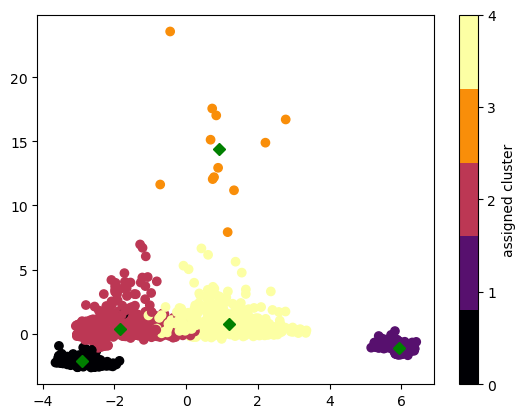

In [99]:
kmeans_model = KMeans(n_clusters=K, init='random', n_init=20)
kmeans_model.fit(Project_scaled)
y = kmeans_model.labels_
pca_model = PCA(n_components=2)
#The n_components parameter is set to 2, indicating that we want to reduce 
#the dimensionality of the data to two dimensions.
pca_coordinates = pca_model.fit_transform(Project_scaled)
#used to perform the dimensionality reduction on the data_scaled dataset.
#It returns the transformed data, where each row represents the coordinates
#of a data point in the reduced dimensional space.
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=y,
            cmap=plt.cm.get_cmap('inferno',5))
plt.colorbar(ticks=range(5), label='assigned cluster')
for i in range(K):
    plt.plot(pca_centroids[i,0], pca_centroids[i,1] ,'gD') 
print(kmeans_model.inertia_)

The above code extends the previous example by performing dimensionality reduction using PCA and visualizing the clustering results in a 2D scatter plot. The data points are plotted according to their PCA coordinates, and the cluster assignments are represented by different colors. The centroids of each cluster are also plotted as green diamonds on the scatter plot.

Determining the optimal number of clusters is a challenging task and can depend on the specific dataset , we can use Elbow method or Silhouette score method , we proceed with Silhouette 

### Computing the silhouette score and constructing the silhouette plot for the last determined clustering

Silhouette Score: The silhouette score measures the compactness and separation of clusters. It ranges from -1 to 1, where values close to 1 indicate well-separated clusters. Computing the silhouette score for different numbers of clusters and selecting the number with the highest score can be a valid approach.

Compute silhouette coefficients and choose coefficient that is close to 1 for best clusters.
The thickness of the sihouette plot indicates how big the cluser is.

overall clustering silhouette 0.3598864359812437


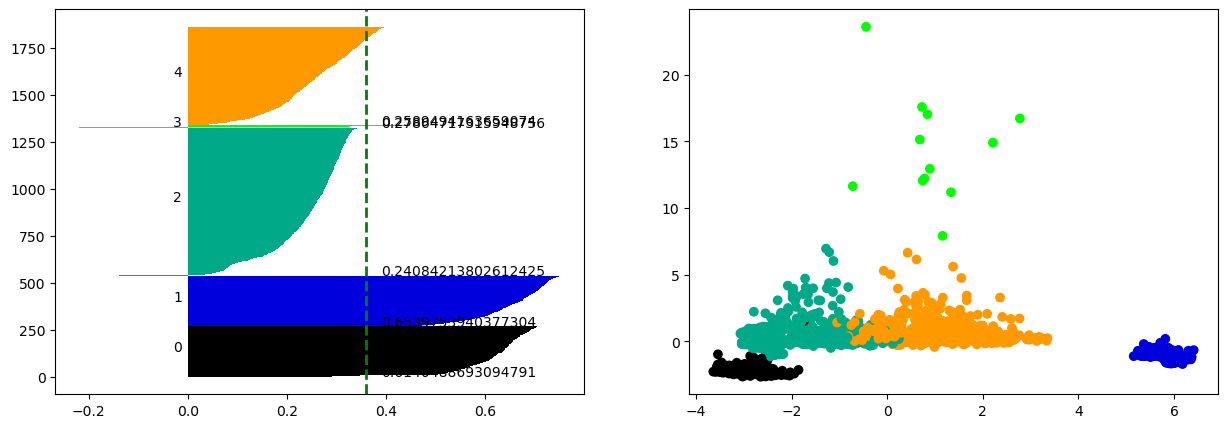

In [100]:

# Calculate the overall silhouette score for the clustering result
silhouette_avg = silhouette_score(Project_scaled, y)
# Calculate the silhouette score for each data point
sample_silhouette_values = silhouette_samples(Project_scaled, y)

print(f'overall clustering silhouette {silhouette_avg}')

# Create a figure with two subplots
fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0

# Iterate over each cluster in the clustering result
for i,cluster in enumerate(np.unique(y)):
    # Get the silhouette values for the current cluster
    cluster_silhouette_vals = sample_silhouette_values[y == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    # Update the upper limit for plotting
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    
    # Plot the silhouette values for the current cluster
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
     # Add a label indicating the cluster number
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    # Add the mean silhouette value for the current cluster
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)
    
# Add a vertical line indicating the average silhouette score
ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(y.astype(float) / K)
# Scatter plot of the data points in the reduced 2D space

ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)


In [101]:
y

array([0, 0, 0, ..., 2, 2, 2])

### Silhouette Analysis

In [102]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Project_scaled)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

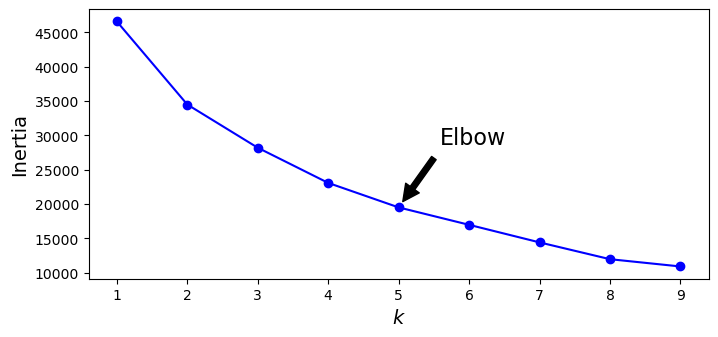

In [103]:
def plot_elbow_figure():
    plt.figure(figsize=(8, 3.5))
    plt.plot(range(1, 10), inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
    
plot_elbow_figure()

As you can see, there is an elbow at k=5, so it might be a good choice but this diagram does not clarifies which one to pick exactly for optimal results. an another approach would be to plot Silhouette coefficients diagram for finding the optimal value of k.

In [104]:
silhouette_score(Project_scaled, y)


0.3598864359812437

Text(0, 0.5, 'Silhouette score')

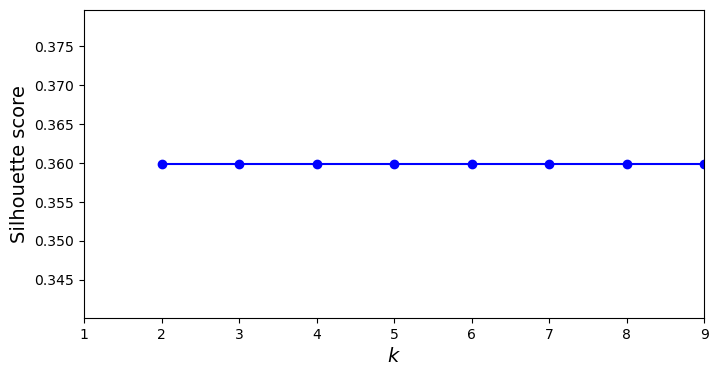

In [105]:
silhouette_scores = [silhouette_score(Project_scaled, y)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.xlim(1, 9)
plt.ylabel("Silhouette score", fontsize=14)

-So, we can see that Silhoutte score remains constant with the change in number of clusters which clearly shows that Clustering is not a better startegy for this data set.

-An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:

### Silhouette Diagrams

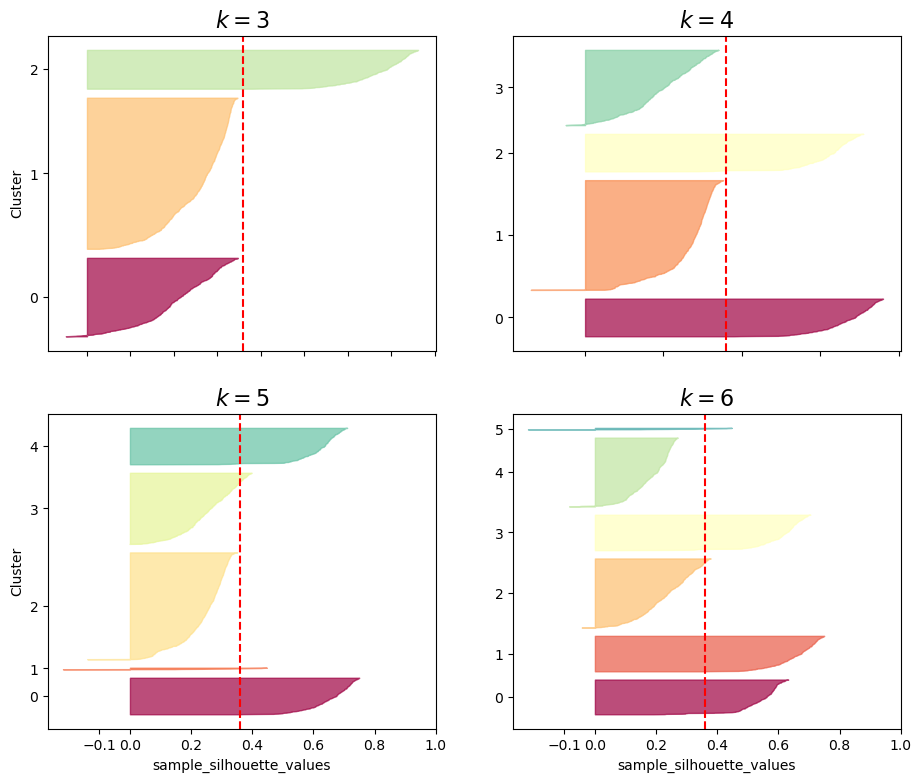

In [106]:

plt.figure(figsize=(11, 9))

for k in (3,4,5,6):
    plt.subplot(2, 2, k-2)
    #sets up a subplot grid with 2 rows, 2 columns, and the current index determined by k - 2.
    y_pred = kmeans_per_k[k - 1].labels_ #alculates the silhouette values using silhouette_samples 
    #function, providing the scaled dataset 
    sample_silhouette_values = silhouette_samples(Project_scaled, y_pred)

    padding = len(Project_scaled) // 30
    #Set up variables for positioning the silhouette plots within each subplot:
    #The padding variable is used to add space between the silhouette plots, and pos keeps track of the current position.
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = sample_silhouette_values[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    #This loop plots the silhouette values for each cluster as filled areas
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    #These conditions set the y-axis label for certain values of k and customize 
    #the x-axis label for others. Additionally, for some values of k, the x-axis tick labels are removed.
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("sample_silhouette_values")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    #Add a vertical dashed line to represent the average silhouette score for the current value of k:
    plt.title("$k={}$".format(k), fontsize=16)

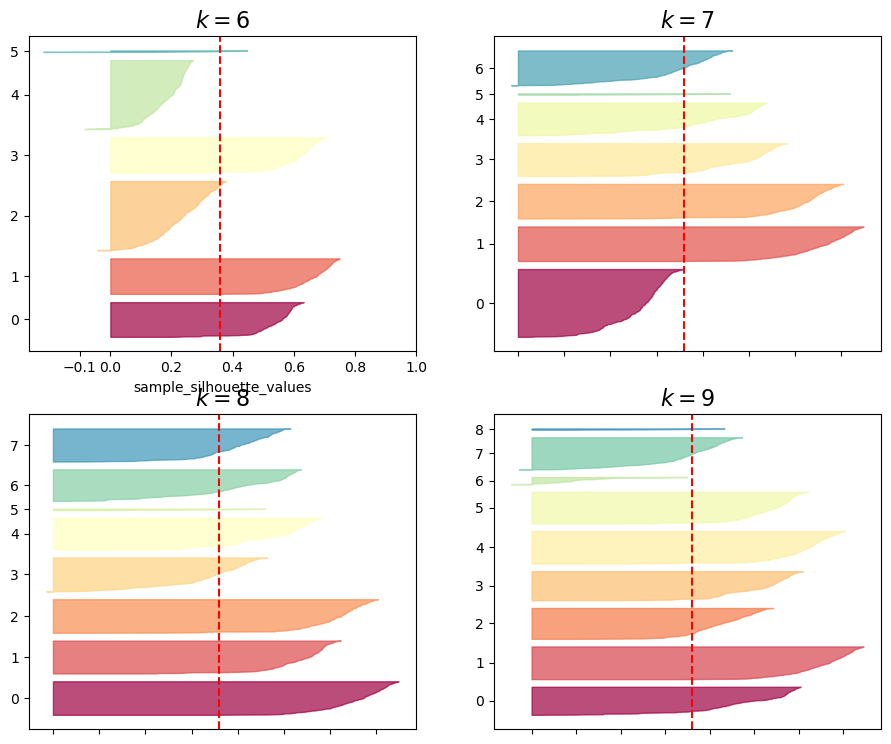

In [107]:

plt.figure(figsize=(11, 9))

for k in (6,7,8,9):
    plt.subplot(2, 2, k-5)
    #sets up a subplot grid with 2 rows, 2 columns, and the current index determined by k - 2.
    y_pred = kmeans_per_k[k - 1].labels_ #Calculates the silhouette values using silhouette_samples 
    #function, providing the scaled dataset 
    sample_silhouette_values = silhouette_samples(Project_scaled, y_pred)

    padding = len(Project_scaled) // 30
    #Set up variables for positioning the silhouette plots within each subplot:
    #The padding variable is used to add space between the silhouette plots, and pos keeps track of the current position.
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = sample_silhouette_values[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    #This loop plots the silhouette values for each cluster as filled areas
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    #These conditions set the y-axis label for certain values of k and customize 
    #the x-axis label for others. Additionally, for some values of k, the x-axis tick labels are removed.
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("sample_silhouette_values")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    #Add a vertical dashed line to represent the average silhouette score for the current value of k:
    plt.title("$k={}$".format(k), fontsize=16)

it seems that  k=8  is the best option here, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.

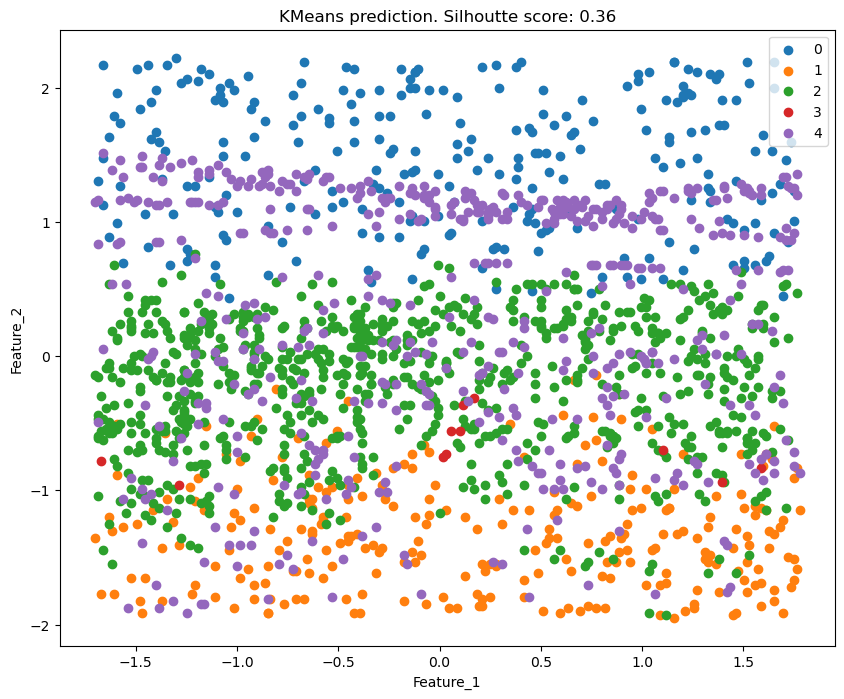

In [108]:
# visualize output
fig = plt.figure(figsize=(10, 8))
for label in np.unique(y):
    project_scaled_label = Project_scaled[y==label]
    plt.scatter([x[0] for x in project_scaled_label], [x[1] for x in project_scaled_label], label=label)

score = silhouette_score(Project_scaled, y)
plt.legend()
plt.title("KMeans prediction. Silhoutte score: {0:.2f}".format(score))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()


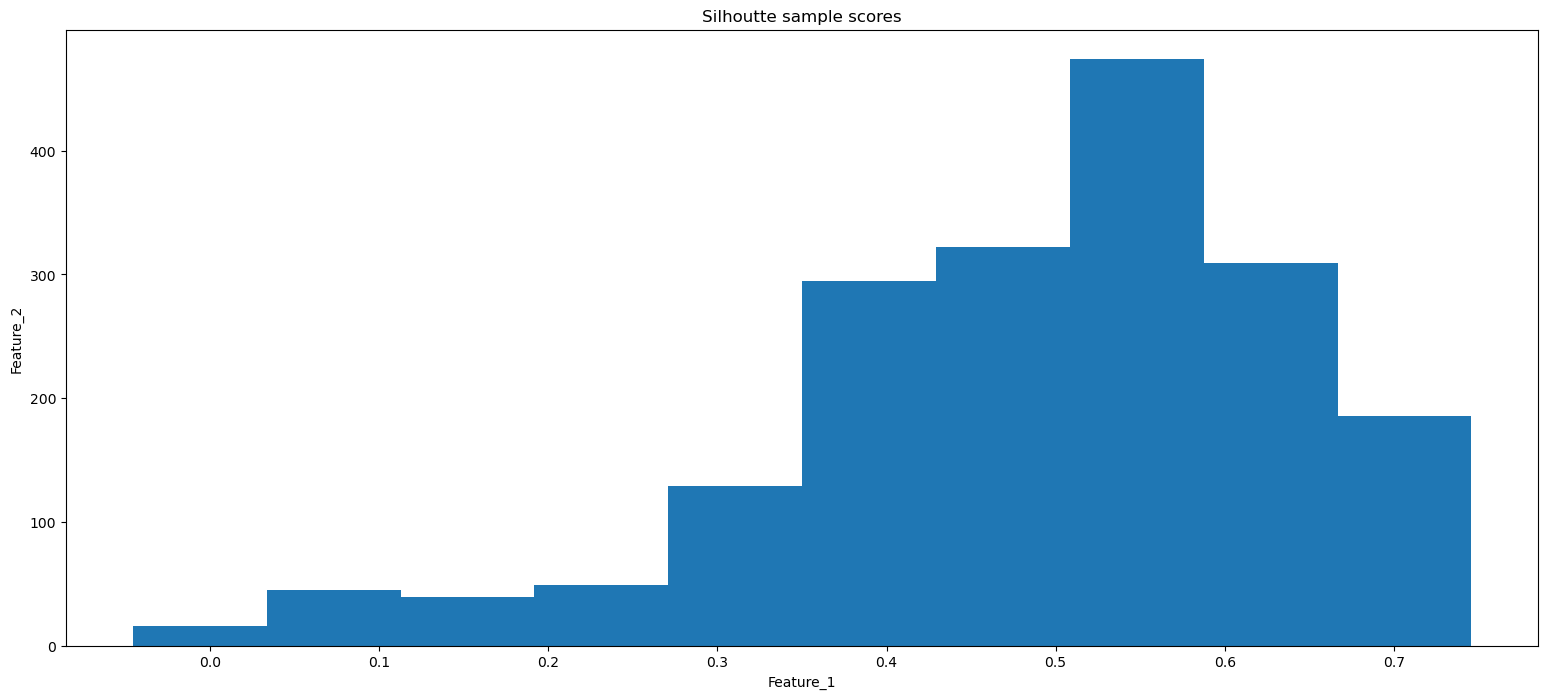

In [109]:
# visualize silhoutte sample scores

score = silhouette_score(Project_scaled, y)
fig = plt.figure(figsize=(19, 8))
sample_silhouette_values = silhouette_samples(Project_scaled, y_pred)
plt.hist(sample_silhouette_values)
plt.title("Silhoutte sample scores".format(score))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

The highest bar in the histogram suggests that there is a cluster or a group of data points that have relatively high similarity within their own clusters compared to other clusters. This indicates that the clustering algorithm has successfully separated these data points into distinct clusters. However, it does not provide a complete picture of the clustering performance.

The silhouette sample scores is at a value of around 0.55, it indicates that a significant number of data points have a silhouette score around that value.

### "Multiclass Classification"

Dividing the dataset in training and testing set, train a SVM classification model with default options for hyperparameters and compute different classification scores for the training and testing set.

In [110]:
P = project


In [111]:
P

,IMAGES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110,189,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86,187,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225,244,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47,232,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97,186,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,CEMENT,233,159,9,0.000000,0.0,2.500000,0.522222,1.277778,1.574074,6.629630,5.111111,10.111111,4.666667,-4.555555,10.444445,-5.888889,10.111111,0.541667,-1.999443
1860,CEMENT,32,158,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
1861,CEMENT,8,162,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
1862,CEMENT,128,161,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307


In [112]:
# Separate the features from the target
X = P.drop('IMAGES', axis=1)  # Features
y = P['IMAGES']  # Target variable


In [113]:
le = LabelEncoder()

P['IMAGES'] = le.fit_transform(P['IMAGES'])

q = le.transform(y)

In [114]:
P

,IMAGES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,3,110,189,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,3,86,187,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,3,225,244,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,3,47,232,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,3,97,186,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,1,233,159,9,0.000000,0.0,2.500000,0.522222,1.277778,1.574074,6.629630,5.111111,10.111111,4.666667,-4.555555,10.444445,-5.888889,10.111111,0.541667,-1.999443
1860,1,32,158,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
1861,1,8,162,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
1862,1,128,161,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307


In [115]:
# Separate the features from the target
X = P.drop('IMAGES', axis=1)  # Features
y = P['IMAGES']  # Target variable


In [116]:
X

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110,189,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86,187,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225,244,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47,232,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97,186,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,233,159,9,0.000000,0.0,2.500000,0.522222,1.277778,1.574074,6.629630,5.111111,10.111111,4.666667,-4.555555,10.444445,-5.888889,10.111111,0.541667,-1.999443
1860,32,158,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
1861,8,162,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
1862,128,161,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307


In [117]:
y

0       3
1       3
2       3
3       3
4       3
       ..
1859    1
1860    1
1861    1
1862    1
1863    1
Name: IMAGES, Length: 1864, dtype: int32

Next, split the data into a training set and a testing set. We'll use 70% of the data for training and 30% for testing

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% testing


In [119]:
# Data Transformation
# Standardize the dataset by rescaling the distribution of values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# convert the array back to a dataframe
X_train = DataFrame(X_train)
X_test = DataFrame(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1304, 19) (560, 19)
(1304,) (560,)


In [120]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
print(f'\u03B20 and \u03B21 are {logreg_model.intercept_} and {logreg_model.coef_}')

β0 and β1 are [ 0.48072175  3.60359224  2.99334951 -3.46280552 -3.408351   -5.17921009
  4.9727031 ] and [[-1.28369859 -2.71302634  0.          0.78461013 -0.30606137 -0.92392067
  -0.08642396 -0.27006562 -0.11493887 -0.72670426  0.20774019 -0.91005729
  -1.44176479  6.95950034 -1.1027557  -5.29448471 -0.9086804   0.96978347
   2.82478351]
 [ 0.10264838 -2.16714483  0.          0.32948765 -0.32636118  1.07109465
  -0.43786453 -1.00892354 -0.40337246  0.46901652  0.49994313  0.53821986
   0.35999957  0.10743478  0.46898869 -0.88111387  0.50132615 -2.57341639
  -1.37588431]
 [-1.38800421 -2.2397818   0.         -0.20696673  0.25004363  1.51505575
   0.91612133  1.73537024  0.84194998 -1.61346867 -2.07075813 -1.53852393
  -1.23036706 -2.92012777 -0.07053718  3.0895112  -1.59529332  4.27267506
  -2.31930322]
 [-0.30808409  2.73983766  0.          0.42855178 -0.08444837  0.02295002
  -0.0197009   0.2010594  -0.04192629 -0.06877902 -0.12731739 -0.4067776
   0.35323613 -0.40476505 -1.68483771

In [121]:
print(X,X.shape)
print(y,y.shape)

      REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0                     110                  189                   9   
1                      86                  187                   9   
2                     225                  244                   9   
3                      47                  232                   9   
4                      97                  186                   9   
...                   ...                  ...                 ...   
1859                  233                  159                   9   
1860                   32                  158                   9   
1861                    8                  162                   9   
1862                  128                  161                   9   
1863                  124                  162                   9   

      SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
0                 0.000000                   0.0    1.000000  0.666667   
1          

In [122]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Now, we'll a Classifier with default hyperparameters

In [123]:
svm_model = SVC() #reates a Support Vector Machine (SVM) classifier with default parameters.
svm_model.fit(X_train, y_train) #trains the SVM classifier on our training data.
 #Next to use the trained SVM classifier to make predictions on the training and testing data.
y_predicted_train = svm_model.predict(X_train)
y_predicted_test = svm_model.predict(X_test)

In [124]:
#the proportion of correct predictions over total predictions. It's a common metric for classification tasks.
print("Training Accuracy:", metrics.accuracy_score(y_train, y_predicted_train))
#average of recall obtained on each class. It's useful for imbalanced datasets.
print("Training Balanced Accuracy:", metrics.balanced_accuracy_score(y_train, y_predicted_train))
#the proportion of actual positive cases that were correctly identified.
print("Training Recall:", metrics.recall_score(y_train, y_predicted_train, average='weighted'))
#the proportion of predicted positive cases that were correct.
print("Training Precision:", metrics.precision_score(y_train, y_predicted_train, average='weighted'))
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_predicted_test))
print("Testing Balanced Accuracy:", metrics.balanced_accuracy_score(y_test, y_predicted_test))
print("Testing Recall:", metrics.recall_score(y_test, y_predicted_test, average='weighted'))
print("Testing Precision:", metrics.precision_score(y_test, y_predicted_test, average='weighted'))


Training Accuracy: 0.933282208588957
Training Balanced Accuracy: 0.9334362341084711
Training Recall: 0.933282208588957
Training Precision: 0.9340933036789331
Testing Accuracy: 0.9392857142857143
Testing Balanced Accuracy: 0.9394020766201219
Testing Recall: 0.9392857142857143
Testing Precision: 0.9444886440052344


Note that the recall_score and precision_score functions are typically used for binary classification tasks. As we are working with multi-class data, We'll need to set the average parameter (e.g., average='weighted').

-Model Accuracy: how often is the classifier correct?

-Model Precision: what percentage of positive tuples 
are labeled as such?

-Model Recall: what percentage of positive tuples are labelled as such?


In [125]:
#to find the best parameters for a support vector machine (SVM) classifier.
from sklearn.model_selection import GridSearchCV
#
grid_of_values ={'C':[1, 100], 'kernel':['linear', 'rbf']}
grid_model = GridSearchCV(estimator=SVC(), param_grid=grid_of_values, cv=5)
#cv=5 Indicates 5-fold cross-validation will be performed.
grid_model.fit(X_train,y_train)
best_params = grid_model.best_params_
print(best_params)

#the code performs a grid search using cross-validation to find the best parameters
#(C and kernel) for an SVM classifier. The GridSearchCV object exhaustively searches
#through the specified parameter grid and returns the best parameter values based on 
#the performance metric (e.g., accuracy) evaluated during cross-validation.


{'C': 100, 'kernel': 'rbf'}


In machine learning, the choice of kernel is an important aspect when using kernel methods, such as Support Vector Machines (SVMs). The kernel function determines the type of decision boundary that can be learned by the SVM.

 `'kernel': ['linear', 'poly', 'rbf']` represents the possible values for the `kernel` hyperparameter in the SVM model.
1. `'linear'`: This represents the linear kernel, which defines a linear decision boundary. It is suitable for linearly separable datasets where the classes can be separated by a straight line or hyperplane.

2. `'poly'`: This represents the polynomial kernel, which allows for nonlinear decision boundaries. It transforms the input features into higher-dimensional space using polynomial functions. The degree of the polynomial can be specified using the `degree` hyperparameter.

3. `'rbf'`: This represents the radial basis function (RBF) kernel, also known as the Gaussian kernel. It is a popular choice for SVMs as it can model complex, nonlinear decision boundaries. The RBF kernel measures the similarity between data points in a high-dimensional feature space. It has a hyperparameter `gamma` that controls the smoothness of the decision boundary.

By specifying these kernel options in the `grid_of_values` dictionary, We are instructing the `GridSearchCV` to search and evaluate different combinations of these kernel types along with other hyperparameters (such as the regularization parameter `C`) to determine the best combination that yields the highest performance based on the provided evaluation metric.

In [126]:
svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'])
svm_model.fit(X_train, y_train)
y_predicted_train = svm_model.predict(X_train)
y_predicted_test = svm_model.predict(X_test)

In [127]:
#the proportion of correct predictions over total predictions. It's a common metric for classification tasks.
print("Training Accuracy:", metrics.accuracy_score(y_train, y_predicted_train))
#average of recall obtained on each class. It's useful for imbalanced datasets.
print("Training Balanced Accuracy:", metrics.balanced_accuracy_score(y_train, y_predicted_train))
#the proportion of actual positive cases that were correctly identified.
print("Training Recall:", metrics.recall_score(y_train, y_predicted_train, average='weighted'))
#the proportion of predicted positive cases that were correct.
print("Training Precision:", metrics.precision_score(y_train, y_predicted_train, average='weighted'))
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_predicted_test))
print("Testing Balanced Accuracy:", metrics.balanced_accuracy_score(y_test, y_predicted_test))
print("Testing Recall:", metrics.recall_score(y_test, y_predicted_test, average='weighted'))
print("Testing Precision:", metrics.precision_score(y_test, y_predicted_test, average='weighted'))


Training Accuracy: 0.9838957055214724
Training Balanced Accuracy: 0.9839776124050318
Training Recall: 0.9838957055214724
Training Precision: 0.9840094086927651
Testing Accuracy: 0.9589285714285715
Testing Balanced Accuracy: 0.9585703677182373
Testing Recall: 0.9589285714285715
Testing Precision: 0.9593178830246926


The accuracy is improved slightly from 0.93 to 0.95 by tuning model's parameters. The optimum set of parameters for this SVM model is 'C': 100, 'kernel': 'rbf'.


In [128]:
# Predictions on validation dataset
# The GradientBoostingClassifier (GBM) shows the most promise as a low complexity and stable model for this problem
model_final = GradientBoostingClassifier()
model_final.fit(X_train, y_train)

# estimate accuracy on validation dataset
model_final.score(X_test, y_test)
y_preds = model_final.predict(X_test)

In [129]:
# Let's see the accuracy score and classification report
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

0.8767857142857143
              precision    recall  f1-score   support

           0       0.98      0.75      0.85        73
           1       0.92      0.82      0.87        84
           2       0.70      0.92      0.80        76
           3       0.95      1.00      0.97        76
           4       1.00      0.99      0.99        88
           5       0.99      1.00      0.99        82
           6       0.66      0.64      0.65        81

    accuracy                           0.88       560
   macro avg       0.89      0.88      0.88       560
weighted avg       0.89      0.88      0.88       560



Overall, the prediction accuracy is above 80%, which is considered a good performance. The results suggested that F1-score is high in "Window" and "path" feature (Class 4 and 5) which had largest sample size. The opposite is true to "grass" (Class 6).

Text(95.72222222222221, 0.5, 'Truth')

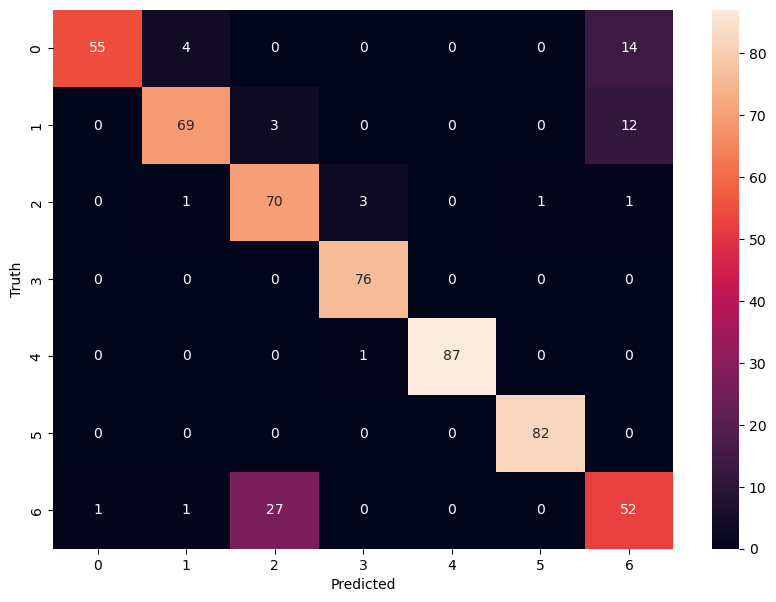

In [130]:
# Now let's visualize prediction performance on a confusion matrix in seaborn
cm_plot = tf.math.confusion_matrix(labels = y_test, predictions = y_preds)
plt.figure(figsize = (10, 7))
sn.heatmap(cm_plot, annot = True, fmt = 'd')
plt.xlabel ('Predicted')
plt.ylabel('Truth')

In [133]:
# Lastly, let's summarize the performance of the fit model using the learning curve

train_sizes, train_scores, test_scores = learning_curve(model_final, X_train, y_train, cv=10, train_sizes=np.linspace(0.01, 1.0, 30))

plt.plot(train_sizes,np.mean(train_scores, axis=1), '--',  label="Training score")
plt.plot(train_sizes,np.mean(test_scores, axis=1), label="Validation score")

plt.title("Learning curve for GradientBoostingClassifier Model")
plt.xlabel('Data size') 
plt.ylabel('Accuracy') 
plt.legend(loc = "best")

KeyboardInterrupt: 

The learning curve suggests that the model achieve high accuracy and is ready for prediction of new dataset.

### Conclusions
-Staring with the problem statement, we performed exploratory data analysis and cleaning before passing the data into algorithms for training and prediction.

-Support Vector Machine (SVM) achieved higher accuracy (0.93). Further tuning of the SVM's model parameters lifted the prediction accuracy slightly to 0.95.

-In an attempt to imrpove the prediction performance, ensemble algorithm was employed to train and test the dataset. The GradientBoostingClassifier (GBM) yielded comparable score to the SVM (~0.84) and it was selected to be the final model for this dataset due to its low complexibility and stability.

-The GBM model produces a high validation score of 0.875 which is in line with the training score.